# 0.0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 0.1 Data Load

In [2]:
df_raw = pd.read_csv('../../projeto/data_raw/credit_card_balance.csv')

In [3]:
df_train = pd.read_csv('../../projeto/data_raw/application_train.csv')

In [4]:
df_description = pd.read_csv('../../projeto/data_raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0)

# 1.0 Data Description

In [20]:
df1 = df_raw.copy()

In [6]:
df1.head().sort_values(by='SK_ID_PREV').T

,3,2,4,0,1
SK_ID_PREV,1389973,1740877,1891521,2562384,2582071
SK_ID_CURR,337855,371185,126868,378907,363914
MONTHS_BALANCE,-4,-7,-1,-6,-1
AMT_BALANCE,236572.11,31815.225,453919.455,56.97,63975.555
AMT_CREDIT_LIMIT_ACTUAL,225000,450000,450000,135000,45000
AMT_DRAWINGS_ATM_CURRENT,2250.0,0.0,0.0,0.0,2250.0
AMT_DRAWINGS_CURRENT,2250.0,0.0,11547.0,877.5,2250.0
AMT_DRAWINGS_OTHER_CURRENT,0.0,0.0,0.0,0.0,0.0
AMT_DRAWINGS_POS_CURRENT,0.0,0.0,11547.0,877.5,0.0
AMT_INST_MIN_REGULARITY,11795.76,2250.0,22924.89,1700.325,2250.0


## 1.1 Feature description

In [7]:
pd.set_option('display.max_colwidth', None)
df_description.loc[ df_description['Table'] == 'credit_card_balance.csv' ].reset_index(drop = 1).head(50)

,Table,Row,Description,Special
0,credit_card_balance.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
1,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
2,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
3,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
4,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,NaN
5,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,NaN
6,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,NaN
7,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,NaN
8,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,NaN
9,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,NaN


## 1.2 Data shape

In [8]:
df1.shape

(3840312, 23)

## 1.3 Check NaN

In [9]:
df1.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

## 1.4 Describe

In [10]:
df1[['SK_ID_CURR','MONTHS_BALANCE','AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','AMT_PAYMENT_CURRENT','AMT_PAYMENT_TOTAL_CURRENT','NAME_CONTRACT_STATUS','SK_DPD']].describe()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,SK_DPD
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.072324e+06,3.840312e+06,3.840312e+06
mean,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,1.028054e+04,7.588857e+03,9.283667e+00
std,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,3.607808e+04,3.200599e+04,9.751570e+01
min,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,1.523700e+02,0.000000e+00,0.000000e+00
50%,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,2.702700e+03,0.000000e+00,0.000000e+00
75%,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,9.000000e+03,6.750000e+03,0.000000e+00
max,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,4.289207e+06,4.278316e+06,3.260000e+03


# 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

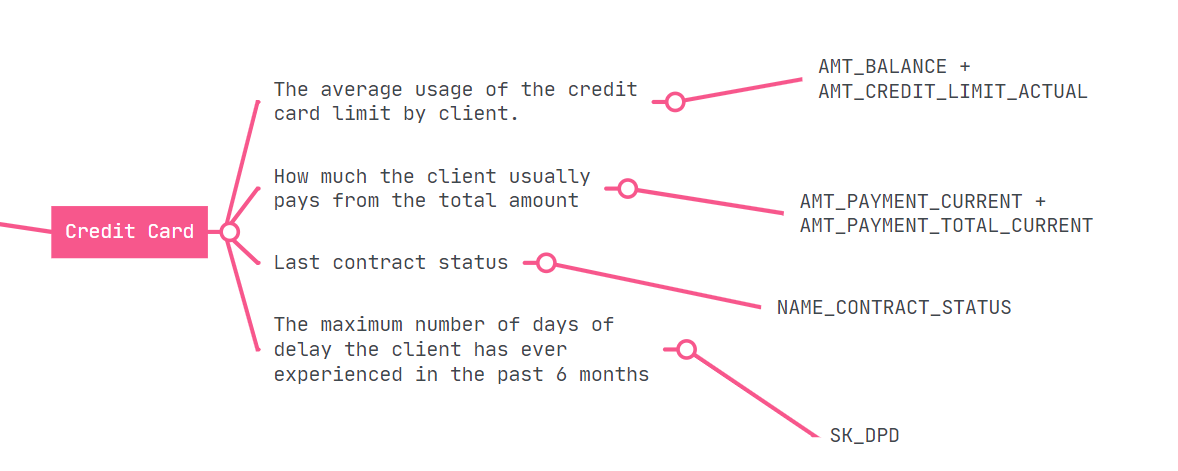

The features and EDA of credit card balance will be developed taking into consideration the business assumptions

In [12]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [13]:
def credit_card_feature_engineering(df_cleaned):

    df_featured = df_cleaned.copy()

    df_featured = df_featured.sort_values(by = ['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = [True,True,False])

    df_featured['CC_LIMIT_USAGE'] = df_featured['AMT_BALANCE'] / df_featured['AMT_CREDIT_LIMIT_ACTUAL']
    df_featured['CC_LIMIT_USAGE'] = df_featured.apply(lambda x: np.nan if x['AMT_CREDIT_LIMIT_ACTUAL'] == 0 else x['CC_LIMIT_USAGE'], axis = 1)

    df_featured['CC_PAYMENT_DIV_MINIMAL'] = df_featured['AMT_PAYMENT_CURRENT'] / df_featured['AMT_PAYMENT_TOTAL_CURRENT']
    df_featured['CC_PAYMENT_DIV_MINIMAL'] = df_featured.apply(lambda x: np.nan if x['AMT_PAYMENT_TOTAL_CURRENT'] == 0 else x['CC_PAYMENT_DIV_MINIMAL'], axis = 1)

    df_featured = df_featured.groupby(['SK_ID_CURR']).agg(CC_LIMIT_USAGE = ('CC_LIMIT_USAGE','mean'),
                                                          CC_PAYMENT_DIV_MINIMAL = ('CC_PAYMENT_DIV_MINIMAL','mean'),
                                                          CC_LAST_NAME_CONTRACT = ('NAME_CONTRACT_STATUS','last'),
                                                          CC_MAX_DPD = ('SK_DPD','max'),
                                                          CC_PREV_CRED_QTT = ('SK_ID_PREV','count')).reset_index()


    return df_featured


In [14]:
def join_train_credit_card(df_train, df_credit_card):

    df_train = df_train[['SK_ID_CURR','TARGET']]

    df_merged = df_train.merge(df_credit_card, on = 'SK_ID_CURR', how = 'left', validate = 'one_to_one')

    return df_merged

In [15]:
def feature_analysis(df_final):

    df_analysis = df_final.copy()

    for col in df_analysis.select_dtypes('number').columns:
        if col not in ['SK_ID_CURR','TARGET']:	
            col_name = f'{col}_q'
            df_analysis[col_name] = pd.qcut(df_analysis[col], q = 4,labels=False, duplicates='drop')
            df_analysis.groupby(col_name)['TARGET'].mean().plot()
            plt.axhline(df_analysis['TARGET'].mean(), color = 'red', linestyle = '--')
            plt.ylim(bottom = 0)
            plt.title(col)
            plt.show()


In [16]:
df_featured = credit_card_feature_engineering(df2)

In [17]:
df_featured.head()

,SK_ID_CURR,CC_LIMIT_USAGE,CC_PAYMENT_DIV_MINIMAL,CC_LAST_NAME_CONTRACT,CC_MAX_DPD,CC_PREV_CRED_QTT
0,100006,0.000000,NaN,Active,0,6
1,100011,0.302678,1.0,Active,0,74
2,100013,0.115301,1.0,Active,1,96
3,100021,0.000000,NaN,Active,0,17
4,100023,0.000000,NaN,Active,0,8


In [18]:
df_final = join_train_credit_card(df_train, df_featured)

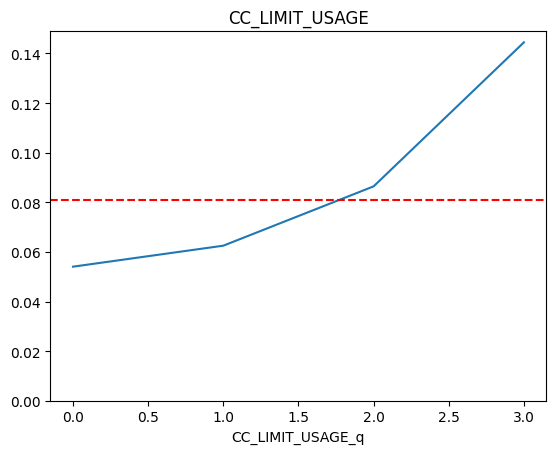

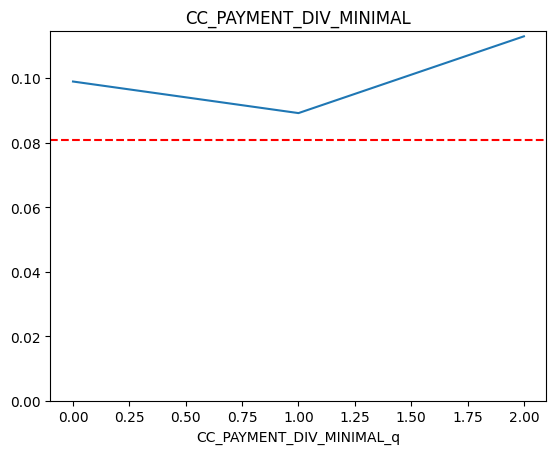

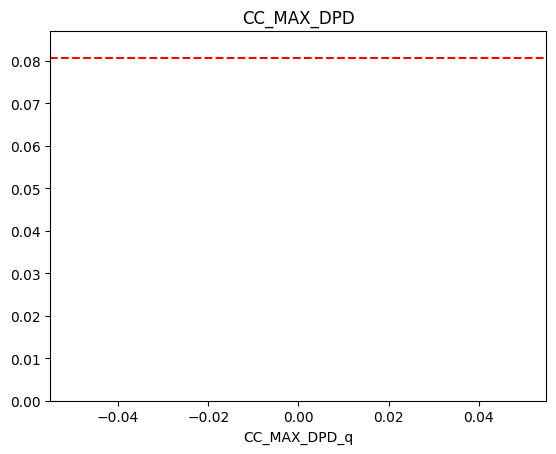

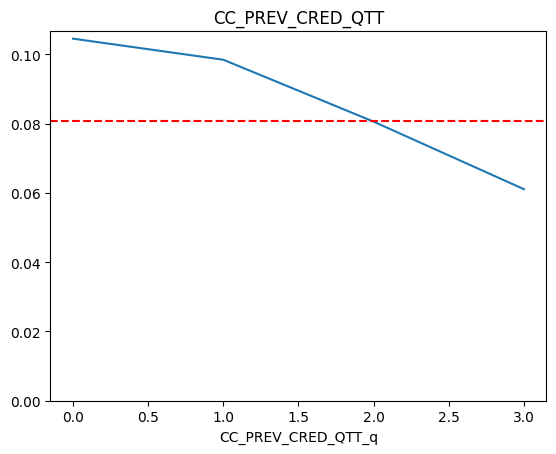

In [19]:
feature_analysis(df_final)

In [21]:
df_featured.to_parquet('../../projeto/data_featured/credit_card_balance.parquet')